# <a id='toc1_'></a>[Data Source 1 -  Cleaning](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Data Source 1 -  Cleaning](#toc1_)    
  - [Import libraries an PyPower](#toc1_1_)    
  - [Deliverect General](#toc1_2_)    
    - [Import Data](#toc1_2_1_)    
    - [Data cleaning basics](#toc1_2_2_)    
      - [Check for null values](#toc1_2_2_1_)    
      - [Unify names and column spaces](#toc1_2_2_2_)    
      - [Duplicated](#toc1_2_2_3_)    
      - [Constants detection](#toc1_2_2_4_)    
      - [Delete columns with zero count (nulls) and one count (constants)](#toc1_2_2_5_)    
      - [Re-check for nulls](#toc1_2_2_6_)    
      - [We check the value of null columns](#toc1_2_2_7_)    
    - [Final DataFrame](#toc1_2_3_)    
  - [Deliverect Items](#toc1_3_)    
    - [Import Data](#toc1_3_1_)    
    - [Data cleaning basics](#toc1_3_2_)    
      - [Check for null values](#toc1_3_2_1_)    
      - [Unify names and column spaces](#toc1_3_2_2_)    
      - [Duplicated](#toc1_3_2_3_)    
        - [There are unpriced items that must be assigned to a table of extras (Next steps)](#toc1_3_2_3_1_)    
      - [Constants detection](#toc1_3_2_4_)    
      - [Drop columns with a count (constants)](#toc1_3_2_5_)    
      - [Check row with orderid null](#toc1_3_2_6_)    
      - [Check rows with null discounttotal](#toc1_3_2_7_)    
      - [Re-check for nulls](#toc1_3_2_8_)    
  - [Export clean dataframes](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Import libraries an PyPower](#toc0_)

In [32]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import sys
sys.path.append('../Python')
from  PyPower import *

## <a id='toc1_2_'></a>[Deliverect General](#toc0_)

### <a id='toc1_2_1_'></a>[Import Data](#toc0_)

The information is in three dataframes which are then concatenated 

In [ ]:
deliverect = pd.concat([pd.read_csv('../../data/0-raw/20230101-20233004_deliverect.csv'), 
                        pd.read_csv('../../data/0-raw/20230501-20230830_deliverect.csv'), 
                        pd.read_csv('../../data/0-raw/20230831-20231031_deliverect.csv')])

deliverect_original_shape= deliverect.shape

deliverect.head()

,PickupTime,PickupTimeUTC,CreatedTime,CreatedTimeUTC,ScheduledTime,ScheduledTimeUTC,Location,OrderID,Channel,Status,ReceiptID,Type,Voucher,Payment,PaymentAmount,Rebate,Note,ServiceCharge,DeliveryCost,DiscountTotal,Tip,DriverTip,SubTotal,Brands,ChannelLink,Tax,VAT,FailureMessage,IsTestOrder
0,2023-04-30 23:11:21+0200,2023-04-30 21:11:21,2023-04-30 22:51:18+0200,2023-04-30 20:51:18,NaN,NaN,Alicante - Periodista Rodolfo Salazar,C5C6A,Uber Eats,DELIVERED,26.0,DELIVERY,NaN,ONLINE,12.9,0.0,Contacts: +34 910 78 09 61#309 03 418/Customer...,0.0,0.0,-12.9,0.0,0.0,25.8,NaN,Uber Eats,0.0,1.18,NaN,False
1,2023-04-30 23:01:41+0200,2023-04-30 21:01:41,2023-04-30 22:36:25+0200,2023-04-30 20:36:25,NaN,NaN,Alicante - Periodista Rodolfo Salazar,BD770,Uber Eats,DELIVERED,25.0,PICKUP,NaN,ONLINE,15.9,0.0,Contacts: +34 910 78 09 61#101 80 683/Customer...,0.0,0.0,-12.9,0.0,0.0,28.8,NaN,Uber Eats,0.0,1.45,NaN,False
2,2023-04-30 22:31:06+0200,2023-04-30 20:31:06,2023-04-30 22:10:04+0200,2023-04-30 20:10:04,NaN,NaN,Alicante - Periodista Rodolfo Salazar,A892B,Uber Eats,DELIVERED,24.0,DELIVERY,NaN,ONLINE,21.8,0.0,Contacts: +34 910 78 09 61#771 54 556/Customer...,0.0,0.0,0.0,0.0,0.0,21.8,NaN,Uber Eats,0.0,1.98,NaN,False
3,2023-04-30 22:20:19+0200,2023-04-30 20:20:19,2023-04-30 21:59:31+0200,2023-04-30 19:59:31,NaN,NaN,Alicante - Bazan,BB3B8,Uber Eats,ACCEPTED,0.0,DELIVERY,NaN,ONLINE,36.6,0.0,Contacts: +34 910 78 09 61#530 79 515/Customer...,0.0,0.0,0.0,0.0,0.0,36.6,NaN,Uber Eats,0.0,3.34,NaN,False
4,2023-04-30 22:20:13+0200,2023-04-30 20:20:13,2023-04-30 22:01:55+0200,2023-04-30 20:01:55,NaN,NaN,Alicante - Periodista Rodolfo Salazar,1F69D,Uber Eats,DELIVERED,23.0,DELIVERY,NaN,ONLINE,14.0,0.0,Contacts: +34 910 78 09 61#924 22 748/Customer...,0.0,0.0,0.0,0.0,0.0,14.0,NaN,Uber Eats,0.0,1.28,NaN,False


In [34]:
deliverect.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8038 entries, 0 to 1822
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PickupTime        8038 non-null   object 
 1   PickupTimeUTC     8038 non-null   object 
 2   CreatedTime       8038 non-null   object 
 3   CreatedTimeUTC    8038 non-null   object 
 4   ScheduledTime     0 non-null      float64
 5   ScheduledTimeUTC  0 non-null      float64
 6   Location          8038 non-null   object 
 7   OrderID           8037 non-null   object 
 8   Channel           8038 non-null   object 
 9   Status            8038 non-null   object 
 10  ReceiptID         8012 non-null   float64
 11  Type              8038 non-null   object 
 12  Voucher           0 non-null      float64
 13  Payment           8038 non-null   object 
 14  PaymentAmount     8038 non-null   float64
 15  Rebate            8038 non-null   float64
 16  Note              7483 non-null   object 
 17  

### <a id='toc1_2_2_'></a>[Data cleaning basics](#toc0_)

#### <a id='toc1_2_2_1_'></a>[Check for null values](#toc0_)

'N nan cols: 8'

ScheduledTime       100.000000
ScheduledTimeUTC    100.000000
OrderID               0.012441
ReceiptID             0.323464
Voucher             100.000000
Note                  6.904703
Brands              100.000000
FailureMessage       99.850709
dtype: float64

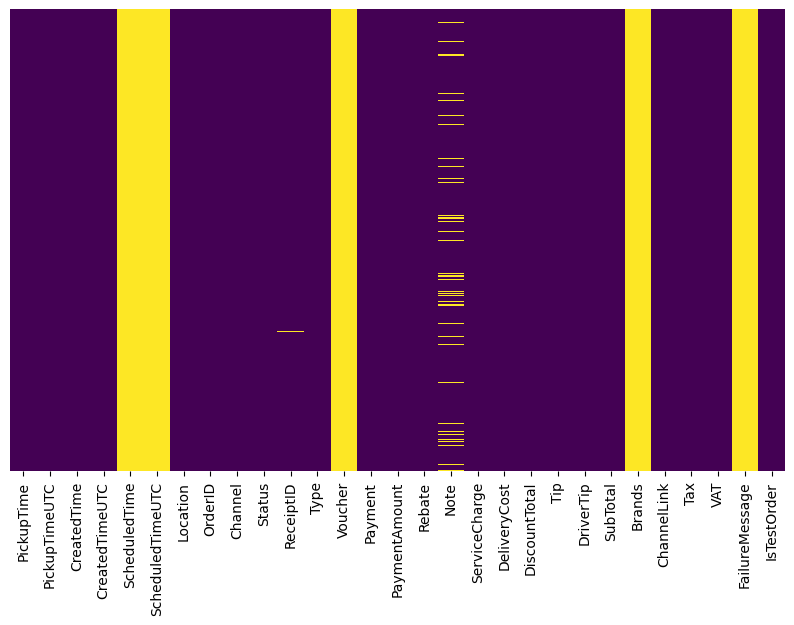

In [35]:
check_nan(deliverect, True)

#### <a id='toc1_2_2_2_'></a>[Unify names and column spaces](#toc0_)

In [36]:
deliverect = column_unification(deliverect)

#### <a id='toc1_2_2_3_'></a>[Duplicated](#toc0_)

In [37]:
deliverect.duplicated().any()

False

#### <a id='toc1_2_2_4_'></a>[Constants detection](#toc0_)

In [38]:
count_columns = column_counts(deliverect)

count_columns

{0: ['scheduledtime', 'scheduledtimeutc', 'voucher', 'brands'],
 1: ['rebate', 'servicecharge', 'tip', 'drivertip', 'tax', 'istestorder'],
 2: ['location', 'type', 'payment'],
 3: ['channel', 'channellink'],
 5: ['failuremessage'],
 6: ['deliverycost'],
 9: ['status'],
 57: ['receiptid'],
 109: ['discounttotal'],
 529: ['vat'],
 693: ['subtotal'],
 1104: ['paymentamount'],
 7233: ['orderid'],
 7481: ['note'],
 7971: ['pickuptime', 'pickuptimeutc'],
 8017: ['createdtime', 'createdtimeutc']}

#### <a id='toc1_2_2_5_'></a>[Delete columns with zero count (nulls) and one count (constants)](#toc0_)

In [39]:
deliverect = drop_columns(deliverect, count_columns[0]+count_columns[1])

#### <a id='toc1_2_2_6_'></a>[Re-check for nulls](#toc0_)

In [40]:
check_nan(deliverect, False)

'N nan cols: 4'

orderid            0.012441
receiptid          0.323464
note               6.904703
failuremessage    99.850709
dtype: float64

#### <a id='toc1_2_2_7_'></a>[We check the value of null columns](#toc0_)

In [41]:
deliverect.reset_index(drop=True, inplace=True)
deliverect[(deliverect.orderid.isna())]

,pickuptime,pickuptimeutc,createdtime,createdtimeutc,location,orderid,channel,status,receiptid,type,payment,paymentamount,note,deliverycost,discounttotal,subtotal,channellink,vat,failuremessage
7501,2023-09-21 14:56:03+0200,2023-09-21 12:56:03,2023-09-21 14:46:31+0200,2023-09-21 12:46:31,Alicante - Periodista Rodolfo Salazar,NaN,Glovo,AUTO_FINALIZED,0.0,DELIVERY,CARD,11.44,Order code: ATWASXSH/,0.0,-2.86,14.3,Glovo,0.0,NaN


There is an order code in the column "note", so we assign it

In [42]:
deliverect.orderid[(deliverect.orderid.isna())] = 'ATWASXSH'

C:\Users\Mjp\AppData\Local\Temp\ipykernel_11044\1390030871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliverect.orderid[(deliverect.orderid.isna())] = 'ATWASXSH'


In [43]:
deliverect[(deliverect.orderid=='ATWASXSH')]

,pickuptime,pickuptimeutc,createdtime,createdtimeutc,location,orderid,channel,status,receiptid,type,payment,paymentamount,note,deliverycost,discounttotal,subtotal,channellink,vat,failuremessage
7501,2023-09-21 14:56:03+0200,2023-09-21 12:56:03,2023-09-21 14:46:31+0200,2023-09-21 12:46:31,Alicante - Periodista Rodolfo Salazar,ATWASXSH,Glovo,AUTO_FINALIZED,0.0,DELIVERY,CARD,11.44,Order code: ATWASXSH/,0.0,-2.86,14.3,Glovo,0.0,NaN


Eliminate the other columns with nulls:
- failuremessage: 99% of nulls
- receiptid: column with no utility for the project
- note: sensitive customer data. Remove it from the project

In [44]:
deliverect.drop(columns=['failuremessage', 'receiptid','note'], inplace=True)

### <a id='toc1_2_3_'></a>[Final DataFrame](#toc0_)

In [45]:
deliverect.head()

,pickuptime,pickuptimeutc,createdtime,createdtimeutc,location,orderid,channel,status,type,payment,paymentamount,deliverycost,discounttotal,subtotal,channellink,vat
0,2023-04-30 23:11:21+0200,2023-04-30 21:11:21,2023-04-30 22:51:18+0200,2023-04-30 20:51:18,Alicante - Periodista Rodolfo Salazar,C5C6A,Uber Eats,DELIVERED,DELIVERY,ONLINE,12.9,0.0,-12.9,25.8,Uber Eats,1.18
1,2023-04-30 23:01:41+0200,2023-04-30 21:01:41,2023-04-30 22:36:25+0200,2023-04-30 20:36:25,Alicante - Periodista Rodolfo Salazar,BD770,Uber Eats,DELIVERED,PICKUP,ONLINE,15.9,0.0,-12.9,28.8,Uber Eats,1.45
2,2023-04-30 22:31:06+0200,2023-04-30 20:31:06,2023-04-30 22:10:04+0200,2023-04-30 20:10:04,Alicante - Periodista Rodolfo Salazar,A892B,Uber Eats,DELIVERED,DELIVERY,ONLINE,21.8,0.0,0.0,21.8,Uber Eats,1.98
3,2023-04-30 22:20:19+0200,2023-04-30 20:20:19,2023-04-30 21:59:31+0200,2023-04-30 19:59:31,Alicante - Bazan,BB3B8,Uber Eats,ACCEPTED,DELIVERY,ONLINE,36.6,0.0,0.0,36.6,Uber Eats,3.34
4,2023-04-30 22:20:13+0200,2023-04-30 20:20:13,2023-04-30 22:01:55+0200,2023-04-30 20:01:55,Alicante - Periodista Rodolfo Salazar,1F69D,Uber Eats,DELIVERED,DELIVERY,ONLINE,14.0,0.0,0.0,14.0,Uber Eats,1.28


## <a id='toc1_3_'></a>[Deliverect Items](#toc0_)

### <a id='toc1_3_1_'></a>[Import Data](#toc0_)

In [46]:
deliverect_items = pd.concat([pd.read_csv('../../data/0-raw/deliverect_items1.csv'),
                            pd.read_csv('../../data/0-raw/deliverect_items2.csv'), 
                            pd.read_csv('../../data/0-raw/deliverect_items3.csv')])

deliverect_items_original_shape= deliverect_items.shape

deliverect_items.head()

,CreatedTime,CreatedTimeUTC,Location,OrderID,Channel,Payment,PaymentAmount,Rebate,SubTotal,Tax,VAT,ProductNames,ItemPrice,ItemQuantities,DiscountTotal
0,2023-04-30 22:51:18+0200,2023-04-30 20:51:18,Alicante - Periodista Rodolfo Salazar,C5C6A,Uber Eats,ONLINE,12.9,0.0,25.8,0.0,1.18,Caprichosa,1290,2,NaN
1,2023-04-30 22:51:18+0200,2023-04-30 20:51:18,Alicante - Periodista Rodolfo Salazar,C5C6A,Uber Eats,ONLINE,12.9,0.0,25.8,0.0,1.18,Pan normal,0,2,NaN
2,2023-04-30 22:51:18+0200,2023-04-30 20:51:18,Alicante - Periodista Rodolfo Salazar,C5C6A,Uber Eats,ONLINE,12.9,0.0,25.8,0.0,1.18,Hecha,0,2,NaN
3,2023-04-30 22:51:18+0200,2023-04-30 20:51:18,Alicante - Periodista Rodolfo Salazar,C5C6A,Uber Eats,ONLINE,12.9,0.0,25.8,0.0,1.18,Patatas fritas caseras,0,2,NaN
4,2023-04-30 22:51:18+0200,2023-04-30 20:51:18,Alicante - Periodista Rodolfo Salazar,C5C6A,Uber Eats,ONLINE,12.9,0.0,25.8,0.0,1.18,Hamburguesa normal,0,2,NaN


In [47]:
deliverect_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67520 entries, 0 to 17827
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreatedTime     67520 non-null  object 
 1   CreatedTimeUTC  67520 non-null  object 
 2   Location        67520 non-null  object 
 3   OrderID         67514 non-null  object 
 4   Channel         67520 non-null  object 
 5   Payment         67520 non-null  object 
 6   PaymentAmount   67520 non-null  float64
 7   Rebate          44713 non-null  float64
 8   SubTotal        67520 non-null  float64
 9   Tax             67520 non-null  float64
 10  VAT             67520 non-null  float64
 11  ProductNames    67520 non-null  object 
 12  ItemPrice       67520 non-null  int64  
 13  ItemQuantities  67520 non-null  int64  
 14  DiscountTotal   40635 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 8.2+ MB


### <a id='toc1_3_2_'></a>[Data cleaning basics](#toc0_)

#### <a id='toc1_3_2_1_'></a>[Check for null values](#toc0_)

'N nan cols: 3'

OrderID           0.008886
Rebate           33.778140
DiscountTotal    39.817832
dtype: float64

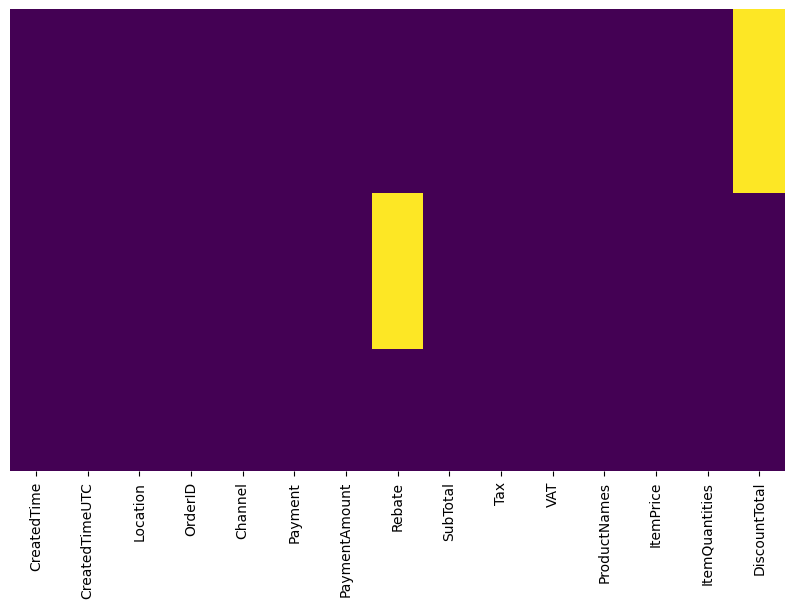

In [48]:
check_nan(deliverect_items)

#### <a id='toc1_3_2_2_'></a>[Unify names and column spaces](#toc0_)

In [49]:
deliverect_items = column_unification(deliverect_items)

#### <a id='toc1_3_2_3_'></a>[Duplicated](#toc0_)

In [50]:
deliverect_items.duplicated().any()

True

In [51]:
deliverect_items[(deliverect_items.duplicated())].head()

,createdtime,createdtimeutc,location,orderid,channel,payment,paymentamount,rebate,subtotal,tax,vat,productnames,itemprice,itemquantities,discounttotal
433,2023-04-29 22:08:07+0200,2023-04-29 20:08:07,Alicante - Bazan,A4GZQRKL,Glovo,CARD,26.80,0.0,26.8,0.0,0.00,Punto,0,1,NaN
437,2023-04-29 22:08:07+0200,2023-04-29 20:08:07,Alicante - Bazan,A4GZQRKL,Glovo,CARD,26.80,0.0,26.8,0.0,0.00,La Caprichosa,0,1,NaN
645,2023-04-29 15:16:34+0200,2023-04-29 13:16:34,Alicante - Periodista Rodolfo Salazar,128288843,Just Eat,CARD,67.99,0.0,66.0,0.0,5.99,Punto,0,1,NaN
973,2023-04-28 20:06:32+0200,2023-04-28 18:06:32,Alicante - Periodista Rodolfo Salazar,806,Glovo,CARD,59.30,0.0,59.3,0.0,0.00,Punto,0,1,NaN
979,2023-04-28 20:06:32+0200,2023-04-28 18:06:32,Alicante - Periodista Rodolfo Salazar,806,Glovo,CARD,59.30,0.0,59.3,0.0,0.00,Hecha,0,1,NaN


##### <a id='toc1_3_2_3_1_'></a>[There are unpriced items that must be assigned to a table of extras (Next steps)](#toc0_)
Let's delete them For the current project

In [52]:
deliverect_items_original_shape

(67520, 15)

In [53]:
deliverect_items = deliverect_items.reset_index(drop=True)
deliverect_items.drop(deliverect_items[deliverect_items['itemprice'] == 0].index, axis=0, inplace=True)

In [54]:
deliverect_items.shape, deliverect_items_original_shape

((26227, 15), (67520, 15))

#### <a id='toc1_3_2_4_'></a>[Constants detection](#toc0_)

In [55]:
count_columns = column_counts(deliverect_items)

count_columns

{1: ['rebate', 'tax'],
 2: ['location', 'payment'],
 3: ['channel'],
 9: ['itemquantities'],
 63: ['itemprice'],
 99: ['discounttotal'],
 136: ['productnames'],
 538: ['vat'],
 703: ['subtotal'],
 1150: ['paymentamount'],
 7689: ['orderid'],
 8635: ['createdtime', 'createdtimeutc']}

#### <a id='toc1_3_2_5_'></a>[Drop columns with a count (constants)](#toc0_)

In [56]:
deliverect_items = drop_columns(deliverect_items, count_columns[1])

#### <a id='toc1_3_2_6_'></a>[Check row with orderid null](#toc0_)

In [57]:
deliverect_items.reset_index(drop=True, inplace=True)
deliverect_items[(deliverect_items.orderid.isna())]

,createdtime,createdtimeutc,location,orderid,channel,payment,paymentamount,subtotal,vat,productnames,itemprice,itemquantities,discounttotal
24753,2023-09-21 14:46:31+0200,2023-09-21 12:46:31,Alicante - Periodista Rodolfo Salazar,NaN,Glovo,CARD,11.44,14.3,0.0,Perla Negra,1430,1,-2.86


In [58]:
#No tengo la información, como es orderid entonces se elimina

deliverect_items.drop(deliverect_items[(deliverect_items.orderid.isna())].index[0], axis=0, inplace=True )

#### <a id='toc1_3_2_7_'></a>[Check rows with null discounttotal](#toc0_)

In [59]:
deliverect_items.discounttotal[deliverect_items.discounttotal.isna()] =0

C:\Users\Mjp\AppData\Local\Temp\ipykernel_11044\19660337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliverect_items.discounttotal[deliverect_items.discounttotal.isna()] =0


#### <a id='toc1_3_2_8_'></a>[Re-check for nulls](#toc0_)

In [60]:
check_nan(deliverect_items, False)

'N nan cols: 0'

Series([], dtype: float64)

## <a id='toc1_4_'></a>[Export clean dataframes](#toc0_)

In [63]:
deliverect.to_csv('../../data/1-clean/deliverect_clean.csv', index=False)
deliverect_items.to_csv('../../data/1-clean/deliverect__items_clean.csv', index=False)